# Ranet on TF2 keras
## Running Cifar10
### Implementation by: Max Midwinter
### Mark 1

#### Import Dependencies

In [1]:
import hyperparameters as hp
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Lambda, ReLU, Input, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from models.small_net import SmallModel
from models.med_net import MedModel
from models.large_net import LargeModel

from main import train, test

#### Loading the Cifar10 dataset
#### Normalize images

170500096/170498071 [==============================] - 4s 0us/step


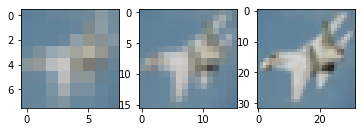

In [2]:
# Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

#x_m = X_train.mean(axis=(0,1,2))
#x_std = X_train.std(axis=(0,1,2))

# large data
X_train_large = X_train
X_test_large = X_test

# medium data
X_train_med = tf.image.resize_with_pad(X_train, 16, 16, antialias=True)
X_test_med = tf.image.resize_with_pad(X_test, 16, 16, antialias=True)

# small data
X_train_small = tf.image.resize_with_pad(X_train, 8, 8, antialias=True)
X_test_small = tf.image.resize_with_pad(X_test, 8, 8, antialias=True)

fig, axes = plt.subplots(1, 3)
axes[0].imshow(X_test_small[10])
axes[1].imshow(X_test_med[10])
axes[2].imshow(X_test_large[10])

#https://towardsdatascience.com/image-augmentation-for-deep-learning-using-keras-and-histogram-equalization-9329f6ae5085

#### Specify Data Augmentation Parameters


In [3]:
datagen = ImageDataGenerator(
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    rotation_range=0,
    fill_mode='constant')

#### Define Small Models

In [4]:
### Create Instance of SmallModel
small_model = SmallModel()

small_model(tf.keras.Input(shape=(8, 8, 3)))
checkpoint_path = "./small_model_checkpoints/"
small_model.summary()

Instructions for updating:
Please use `layer.__call__` method instead.
Model: "small_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
small_conv1 (Conv2D)         (None, 8, 8, 64)          1792      
_________________________________________________________________
small_bn1 (BatchNormalizatio (None, 8, 8, 64)          256       
_________________________________________________________________
small_relu1 (ReLU)           (None, 8, 8, 64)          0         
_________________________________________________________________
small_conv2 (Conv2D)         (None, 8, 8, 64)          36928     
_________________________________________________________________
small_bn2 (BatchNormalizatio (None, 8, 8, 64)          256       
_________________________________________________________________
small_relu2 (ReLU)           (None, 8, 8, 64)          0         
__________________________________________________

#### Fit Small Model

In [5]:
# Compile model graph
small_model.compile(
    optimizer=small_model.optimizer,
    loss=small_model.loss_fn,
    metrics=["sparse_categorical_accuracy"])

# Create checkpoint path
if not os.path.exists(checkpoint_path):
    os.makedirs(checkpoint_path)

train(small_model, X_train_small, y_train, X_test_small, y_test, checkpoint_path,datagen=datagen)
small_model.save_weights("./models/small_weights.h5")

test_loss, test_accuracy = small_model.evaluate(X_test_small, y_test)
print("Small Model Test Accuracy: {}".format(test_accuracy))

Epoch 1/25
782/782 [==============================] - 3s 4ms/step - loss: 1.9593 - sparse_categorical_accuracy: 0.2997 - val_loss: 1.8049 - val_sparse_categorical_accuracy: 0.3708
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 1.7432 - sparse_categorical_accuracy: 0.3864 - val_loss: 1.6772 - val_sparse_categorical_accuracy: 0.4132
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.6503 - sparse_categorical_accuracy: 0.4174 - val_loss: 1.6007 - val_sparse_categorical_accuracy: 0.4305
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 1.5890 - sparse_categorical_accuracy: 0.4377 - val_loss: 1.5525 - val_sparse_categorical_accuracy: 0.4515
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 1.5410 - sparse_categorical_accuracy: 0.4554 - val_loss: 1.5062 - val_sparse_categorical_accuracy: 0.4690
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 1.5027 - sparse_categorica

#### Define Medium Model

In [6]:
### Create Instance of MedModel
med_model = MedModel()

med_model(tf.keras.Input(shape=(16, 16, 3)))
checkpoint_path = "./med_model_checkpoints/"
med_model.summary()

/content
Model: "med_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
small_model_1 (SmallModel)   (None, 10)                265802    
_________________________________________________________________
small_conv1 (Conv2D)         (None, 16, 16, 64)        1792      
_________________________________________________________________
small_bn1 (BatchNormalizatio (None, 16, 16, 64)        256       
_________________________________________________________________
small_relu1 (ReLU)           (None, 16, 16, 64)        0         
_________________________________________________________________
small_conv2 (Conv2D)         (None, 16, 16, 64)        36928     
_________________________________________________________________
med_conv1 (Conv2D)           (None, 16, 16, 64)        1792      
_________________________________________________________________
med_concat1 (Concatenate)    (None, 16, 16, 128)

#### Fit Medim Model

In [7]:
# Compile model graph
med_model.compile(
    optimizer=med_model.optimizer,
    loss=med_model.loss_fn,
    metrics=["sparse_categorical_accuracy"])

# Create checkpoint path
if not os.path.exists(checkpoint_path):
    os.makedirs(checkpoint_path)

train(med_model, X_train_med, y_train, X_test_med, y_test, checkpoint_path,datagen=datagen)
med_model.save_weights("./models/med_weights.h5")

test_loss, test_accuracy = med_model.evaluate(X_test_med, y_test)
print("Medium Model Test Accuracy: {}".format(test_accuracy))

Epoch 1/25
782/782 [==============================] - 8s 11ms/step - loss: 1.8431 - sparse_categorical_accuracy: 0.3410 - val_loss: 1.5714 - val_sparse_categorical_accuracy: 0.4400
Epoch 2/25
782/782 [==============================] - 8s 10ms/step - loss: 1.4845 - sparse_categorical_accuracy: 0.4694 - val_loss: 1.3991 - val_sparse_categorical_accuracy: 0.4901
Epoch 3/25
782/782 [==============================] - 8s 11ms/step - loss: 1.3621 - sparse_categorical_accuracy: 0.5121 - val_loss: 1.3155 - val_sparse_categorical_accuracy: 0.5253
Epoch 4/25
782/782 [==============================] - 8s 11ms/step - loss: 1.2934 - sparse_categorical_accuracy: 0.5407 - val_loss: 1.2686 - val_sparse_categorical_accuracy: 0.5442
Epoch 5/25
782/782 [==============================] - 8s 11ms/step - loss: 1.2462 - sparse_categorical_accuracy: 0.5572 - val_loss: 1.2347 - val_sparse_categorical_accuracy: 0.5562
Epoch 6/25
782/782 [==============================] - 8s 11ms/step - loss: 1.2082 - sparse_cate

#### Define Large Model

In [8]:
### Create Instance of LargeModel
large_model = LargeModel()

large_model(tf.keras.Input(shape=(32, 32, 3)))
checkpoint_path = "./large_model_checkpoints/"
large_model.summary()

/content
/content
/content
Model: "large_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
small_model_2 (SmallModel)   (None, 10)                265802    
_________________________________________________________________
med_model_1 (MedModel)       (None, 10)                734548    
_________________________________________________________________
small_conv1 (Conv2D)         (None, 32, 32, 64)        1792      
_________________________________________________________________
small_bn1 (BatchNormalizatio (None, 32, 32, 64)        256       
_________________________________________________________________
small_relu1 (ReLU)           (None, 32, 32, 64)        0         
_________________________________________________________________
small_conv2 (Conv2D)         (None, 32, 32, 64)        36928     
_________________________________________________________________
med_conv1 (Conv2D)          

#### Fit Large Model

In [9]:
# Compile model graph
large_model.compile(
    optimizer=large_model.optimizer,
    loss=large_model.loss_fn,
    metrics=["sparse_categorical_accuracy"])

# Create checkpoint path
if not os.path.exists(checkpoint_path):
    os.makedirs(checkpoint_path)

train(large_model, X_train_large, y_train, X_test_large, y_test, checkpoint_path,datagen=datagen)
large_model.save_weights("./models/large_weights.h5")

test_loss, test_accuracy = large_model.evaluate(X_test_large, y_test)
print("Large Model Test Accuracy: {}".format(test_accuracy))

Epoch 1/25
782/782 [==============================] - 51s 65ms/step - loss: 1.6780 - sparse_categorical_accuracy: 0.3867 - val_loss: 1.3253 - val_sparse_categorical_accuracy: 0.5199
Epoch 2/25
782/782 [==============================] - 51s 65ms/step - loss: 1.2069 - sparse_categorical_accuracy: 0.5679 - val_loss: 1.1429 - val_sparse_categorical_accuracy: 0.5918
Epoch 3/25
782/782 [==============================] - 51s 65ms/step - loss: 1.0712 - sparse_categorical_accuracy: 0.6198 - val_loss: 1.0477 - val_sparse_categorical_accuracy: 0.6279
Epoch 4/25
782/782 [==============================] - 51s 65ms/step - loss: 0.9905 - sparse_categorical_accuracy: 0.6512 - val_loss: 0.9969 - val_sparse_categorical_accuracy: 0.6492
Epoch 5/25
782/782 [==============================] - 51s 65ms/step - loss: 0.9428 - sparse_categorical_accuracy: 0.6684 - val_loss: 0.9661 - val_sparse_categorical_accuracy: 0.6597
Epoch 6/25
782/782 [==============================] - 51s 65ms/step - loss: 0.9063 - spars

ValueError: ignored

In [10]:
test_loss, test_accuracy = large_model.evaluate(X_test_large, y_test)
print("Large Model Test Accuracy: {}".format(test_accuracy))

313/313 [==============================] - 3s 11ms/step - loss: 0.8145 - sparse_categorical_accuracy: 0.7145
Large Model Test Accuracy: 0.7145000100135803


In [20]:
from google.colab import files
files.download('models/large_weights.h5')
files.download('models/med_weights.h5')
files.download('models/small_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
while True:pass


KeyboardInterrupt: ignored